# Tweet and comments for airline 
### Tweets sentiment analysis data for airline performance 

## Requirements 

In [ ]:
Requirements:
!pip install wordcloud
!pip install pandas 
!pip install warnings 
!pip install textblob
!pip install tokenizer
!pip install tensorflow

# Importing libraries 

In [1]:
import pandas as pd
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import seaborn as sns

# Importing dataset using pandas 

In [2]:
dataset=pd.read_csv("hamza2.csv")

# EDA

In [3]:
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
dataset.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [5]:
dataset.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [6]:
#Dataset information 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

## Creating a function to get the necessary information 

In [7]:
#creaating function 
def check_df(dataframe,head=5):
    print("#################### Shape #################### ")
    print(dataframe.shape)
    print("#################### Types #################### ")
    print(dataframe.dtypes)
    print("#################### Head #################### ")
    print(dataframe.head(head))
    print("#################### Tail #################### ")
    print(dataframe.dtypes)
    print("#################### NA #################### ")
    print(dataframe.isnull().sum())

In [8]:
check_df(dataset)

#################### Shape #################### 
(14640, 15)
#################### Types #################### 
tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object
#################### Head #################### 
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301

# Fetching the required data from the dataset 
## Text and Emotions

In [9]:
#fetching required data
review_dataset= dataset[["text","airline_sentiment"]]

In [10]:
review_dataset.shape

(14640, 2)

In [11]:
review_dataset.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [13]:
dataset.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

## Our data contain more than 14,000 data samples 

In [14]:
#Length of column (airline_sentiment)
len(dataset["airline_sentiment"])

14640

In [15]:
#Length of column (text)
len(dataset["text"])

14640

In [16]:
review_dataset.columns

Index(['text', 'airline_sentiment'], dtype='object')

In [17]:
#discarting usless info
from textblob import TextBlob  

import re

def clean_tweet(tweet):
    '''
Anything that can be used as an airplan is not safe
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z  \t])|(\w+:\/\/\S+)", " ", tweet).split())


for tweet in dataset:
        analysis = TextBlob(clean_tweet(tweet))
        pol = analysis.sentiment.polarity
        sub = analysis.subjectivity
        pol_round = '%.3f' % pol
        sub_round = '%.3f' % sub

### No Need of unbaised reviews for this binary clasification problem, so droping these rows from the dataset 

In [18]:
review_dataset=review_dataset[review_dataset["airline_sentiment"] != "neutral"]

In [19]:
#checking shape of new dataset containing required data  
review_dataset.shape

(11541, 2)

In [20]:
review_dataset.columns

Index(['text', 'airline_sentiment'], dtype='object')

In [21]:
review_dataset.head()

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [22]:
#checking null values 
dataset["airline_sentiment"].isnull().sum()

0

In [23]:
#describing a single column
review_dataset["airline_sentiment"].describe()

count        11541
unique           2
top       negative
freq          9178
Name: airline_sentiment, dtype: object

In [24]:
#checking value counts
review_dataset["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

## Labels for this dataset are categorical and machine only understands the neumerical data so using factorize() method to convert

In [25]:
sentiment_label_data=review_dataset.airline_sentiment.factorize()

In [26]:
sentiment_label_data

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

## 0 Means Positive, 1 Means Negative

### Len() function is used to check the number of integers in sentiment_label_data the result sould be 2 (0,1)

In [27]:
#checking length of sentiment_label_data
len(sentiment_label_data) #0 - 1-------------- 0 represents positive while 1 Represents negative 

2

In [29]:
#passing the text to tweet variable
tweet=review_dataset.text.values

In [34]:
tweet

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it", ...,
       '@AmericanAir thank you we got on a different flight to Chicago.',
       "@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc",
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
      dtype=object)

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [36]:
#tokenization
tokenizer_=Tokenizer(num_words=5000)

In [37]:
tokenizer_

In [38]:
tokenizer_.fit_on_texts(tweet)

### Fit_on_text() method is used to create relationship between words and assigned numbers, these associations are stored in dictionary form in tokenizer.word_index attribute

In [39]:
encoded_docs_=tokenizer_.texts_to_sequences(tweet)

In [40]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [41]:
padded_sequence_=pad_sequences(encoded_docs_,maxlen=200)

## Model 

### Dropping is a very important regularization technique which prevents overfitting in the model 

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,SpatialDropout1D
from tensorflow.keras.layers import Embedding
from keras.layers import Embedding

In [43]:
vocab_size_=len(tokenizer_.word_index)+1
embedding_vector_lenght=32

In [44]:
model_=Sequential()

In [45]:
#setting the parameters 
model_.add(Embedding(vocab_size_,embedding_vector_lenght,input_length=200))
model_.add(SpatialDropout1D(0.25))
model_.add(LSTM(50,dropout=0.5,recurrent_dropout=0.5)),
model_.add(Dropout(0.2))
model_.add(Dense(1,activation="sigmoid"))

In [46]:
model_.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [47]:
model_.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
__________________________________________________

### The summary table of the model provides the strength of relationship model and dependent variable.


## Training the model 

In [48]:
#model training with epoch size = 5
#validation split = 25%
history =model_.fit(padded_sequence_,sentiment_label_data[0],validation_split=0.25,epochs=5,batch_size=32)

Epoch 1/10
271/271 [==============================] - 59s 195ms/step - loss: 0.4159 - accuracy: 0.8269 - val_loss: 0.2228 - val_accuracy: 0.9168
Epoch 2/10
271/271 [==============================] - 52s 193ms/step - loss: 0.2339 - accuracy: 0.9116 - val_loss: 0.1714 - val_accuracy: 0.9349
Epoch 3/10
271/271 [==============================] - 52s 191ms/step - loss: 0.1633 - accuracy: 0.9375 - val_loss: 0.1637 - val_accuracy: 0.9456
Epoch 4/10
271/271 [==============================] - 53s 195ms/step - loss: 0.1353 - accuracy: 0.9493 - val_loss: 0.1723 - val_accuracy: 0.9407
Epoch 5/10
271/271 [==============================] - 56s 207ms/step - loss: 0.1074 - accuracy: 0.9585 - val_loss: 0.1926 - val_accuracy: 0.9414
Epoch 6/10
271/271 [==============================] - 54s 198ms/step - loss: 0.0918 - accuracy: 0.9681 - val_loss: 0.2045 - val_accuracy: 0.9387
Epoch 7/10
271/271 [==============================] - 54s 201ms/step - loss: 0.0850 - accuracy: 0.9709 - val_loss: 0.2152 - val_ac

### Value accuracy = 0.9570

<AxesSubplot:>

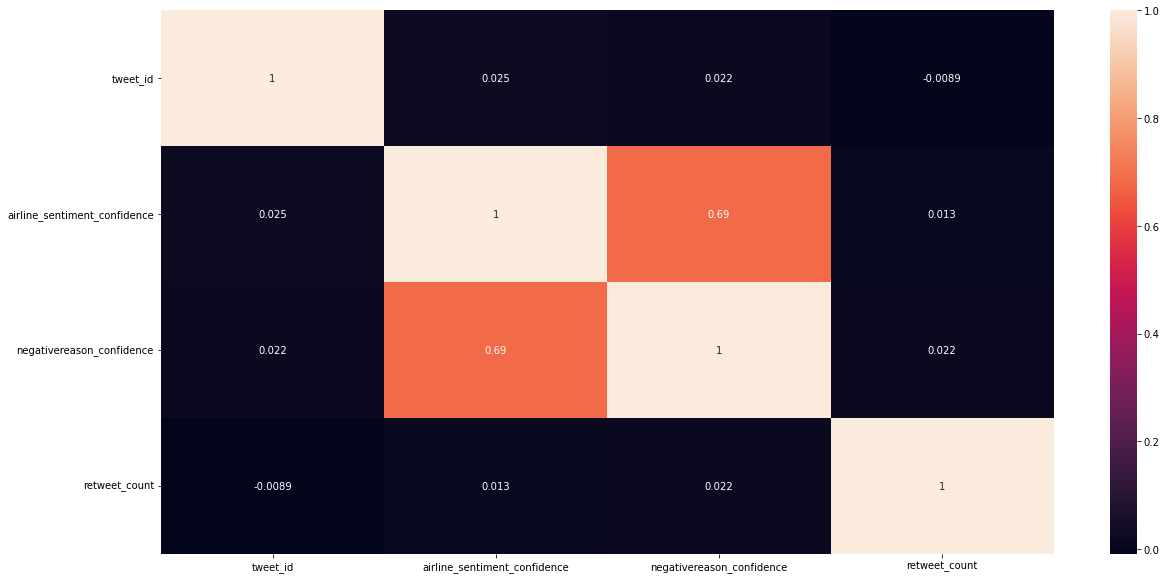

In [50]:
plt.figure(figsize=(20,10))
corr=dataset.corr()
sns.heatmap(corr,annot=True)

In [51]:
#wordcloud=WordCloud(background_color="white",width=900,height=700)
#text_cloud=wordcloud.generate(" ".join(data["text"]))
#plt.figure(figsize=(30,30))
#plt.imshow(text_cloud)
#plt.axis("off")
#plt.show()

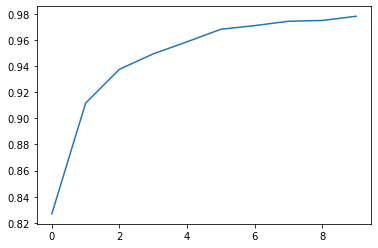

In [52]:
#accuracy plot
plt.plot(history.history["accuracy"],label="acc")

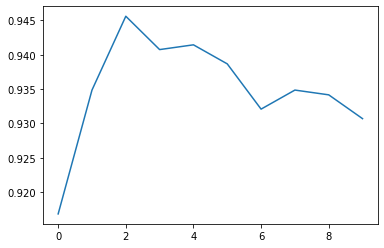

In [53]:
#val Accuracy plot
plt.plot(history.history["val_accuracy"],label="vall_acc")

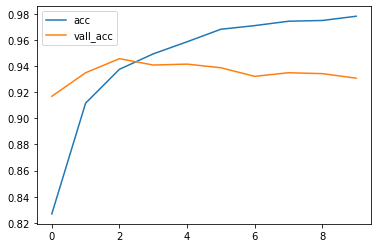

<Figure size 432x288 with 0 Axes>

In [54]:
#combined plot of accuracy and val accuracy 
plt.plot(history.history["accuracy"],label="acc")
plt.plot(history.history["val_accuracy"],label="vall_acc")
plt.legend()
plt.show()
plt.savefig("Accuracy plot.png")

## Loss and Val_loss

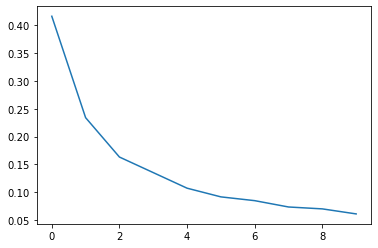

In [55]:
#loss plot
plt.plot(history.history["loss"],label="loss")

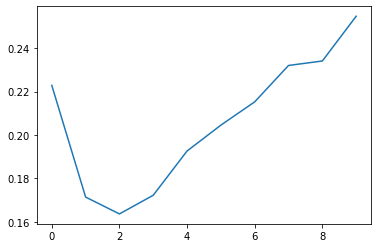

In [56]:
#val loss plot
plt.plot(history.history["val_loss"],label="vall_loss")

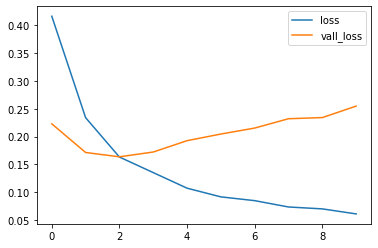

In [57]:
#combined plot of loss and val loss
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="vall_loss")
plt.legend()
plt.show()

## Creating a sentiment analysis model 
### A function model that takes text as input and provide a predictive output tag, Reason for making this function is to make it run faster 

In [58]:
#function for single input text prediction 
def predict_sentiment_(text):
    tw_=tokenizer_.texts_to_sequences([text])
    tw_=pad_sequences(tw_,maxlen=200)
    prediction_=int(model_.predict(tw_).round().item())
    print("Predict Label:",sentiment_label_data[1][prediction_])

In [59]:
#single input passed to the function 
test_sentence_ = " I enjoyed my journey on this flight "
predict_sentiment_(test_sentence_)

1/1 [==============================] - 1s 762ms/step
Predict Label: positive


In [60]:
#single input passed to the function 
test_sentence_2="You buy a ticket from THY. At least they give toast at THY. They also cut it up in Anatolia. They just distribute a little water. We knew Anatolia of THY, but they act as a subsidiary of SunExpress. thy is far from its old quality."
predict_sentiment_(test_sentence_2)

1/1 [==============================] - 0s 41ms/step
Predict Label: negative


In [61]:
#single input passed to the function 
test_sentence_3="Qatar Airways have promised me a refund but have failed to make the refund. They refuse to answer emails and hang up when I phone them"
predict_sentiment_(test_sentence_3)

1/1 [==============================] - 0s 38ms/step
Predict Label: negative


In [62]:
#single input passed to the function 
test_sentence_4="At the Istanbul Airport THY counter, Aylin Karadağlı provided the service we wanted for a long time with her calm and polite demeanor, and we would also like to thank you🙏🏻"
predict_sentiment_(test_sentence_4)

1/1 [==============================] - 0s 35ms/step
Predict Label: positive


# Problem Statement:

### An Airline comapny is in need of a NLP Solution for sentiment analysis fo tweets on their official twitter account so that the company can gain valuable insights from customer experience and opinion, so that the company can understand the level of customer satisfaction and identify the areas of improvement 

# Key aspects of the problem:

### 1- Sentiment Analysis

### 2- Binanry Classification 

### 3- NLP techniques to preprocess and transform the textual data 

### 4- Model development and Evaluation 

# Formulating the Problem:

### It can be formulated as a supervised binary classification task with a given dataset of tweets

# Goal:

### The goal is to develop a model that would be able to classify each tweet as positive or negative sentiment, The model should be able to predict accurately on the unseen data.

# High level system design:

### Data Collection

### Text preprocessing: 
#### Cleaning and transforming the raw tweet data, Removing unwanted characters, converting text to lowercase, tokenization, removing stopwords and applying techniques like stemming for normalization  

### Feature Extraction 

### Model selection and training 

### Model evaluation 

# Connection of components:

### 1- The data is collected in raw form with labels 

### 2- text preprocessing component takes the raw data and perform preprocessing (Cleaning, normalization, tokenization) to prepare it for feature extraction 

### 3- Feature extreaction component then converts the text which has been preprocessed into numerical form 

### 4- Model selection and training then take those extracted features and apply selected algorithm to learn patterns and prediction 


# Necessity of components:
### Data collection makes sure a diverse and representable dataset for training 

### Text preprocessing make sure to clean and normalize the data 

### Feature extraction transform the text into numerical format to capture the important information for analysis 

### Model selection and training determine that the algorithm learns from the data and makes accurate prediction.

# Final Discussion:

## Overall pipeline discussion:

#### 1- Flexibility: As this model can handle large volumn of tweets, which makes it suitable for real time sentiment analysis 

#### 2- Interpretable Results: This pipeline can provide insights into which words (feature) contribute the most for sentiment classification 

#### 3- Scalability: As discussed earlier it can handle very large volumn of tweets which makes it highly scalable 

## Implications of Results for the business problem:

#### 1- Customer Insights

#### 2- Brand reputation management 

#### 3- Customer engagement and feedback analysis 

## Data-Driven recommendations 

#### 1- Continous data collection

#### 2- Augmenting labeled data

#### 3- Model Evaluation 

#### 4- Iterative model improvement 

#### 5- Integration with business system 